Total # of images: 612
Image size: (384, 288)


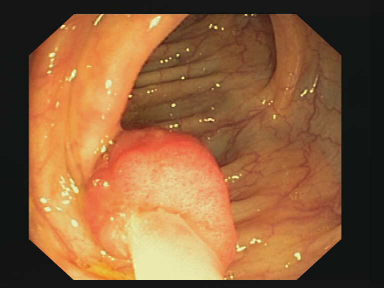

In [14]:
import os 
import matplotlib.pyplot as plt
import cv2 
import numpy as np
from PIL import Image
from tqdm import tqdm

ori_image_root = '../data/PNG/Original'
ori_image_list = os.listdir(ori_image_root)
ori_images = [os.path.join(ori_image_root, image) for image in ori_image_list]

mask_dir = '/data1/yoojinoh/codes/mlops/data/PNG/Ground Truth'
mask_paths = [os.path.join(mask_dir, fname) for fname in os.listdir(mask_dir)]

image = Image.open(ori_images[0])
image = image.convert('RGB')
print(f'Total # of images: {len(ori_images)}')
print(f'Image size: {image.size}')
image

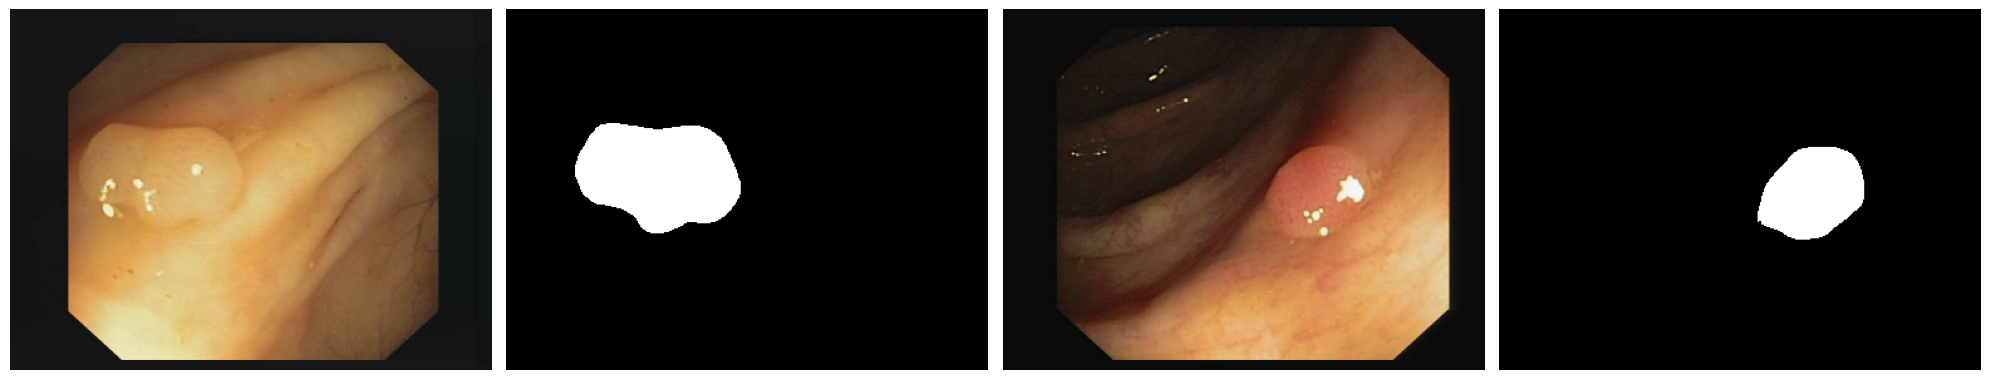

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 

for i in range(2): 
    ori_image = Image.open(ori_images[i + 10]).convert('RGB')
    axes[i * 2].imshow(ori_image)
   # axes[i * 2].set_title(f'Original {i + 1}')
    axes[i * 2].axis('off')

    mask_image = Image.open(mask_paths[i + 10]).convert('L')  
    axes[i * 2 + 1].imshow(mask_image, cmap='gray')
   # axes[i * 2 + 1].set_title(f'Mask {i + 1}')
    axes[i * 2 + 1].axis('off')

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
image_sizes = []
cnt = 0
for img_path in ori_images:
    image = cv2.imread(img_path)
    h, w = image.shape[:2]
    if (h, w) != (288, 384):
        print(img_path)
        cnt += 1
if cnt == 0:
    print('All images are 288x384')


All images are 288x384


  0%|          | 0/612 [00:00<?, ?it/s]

100%|██████████| 612/612 [00:01<00:00, 506.58it/s]


# of Total Pixels: 67,682,304
# of Polyp Pixels: 6,203,497 (9.17%)
# of Background Pixels: 61,387,764 (90.70%)


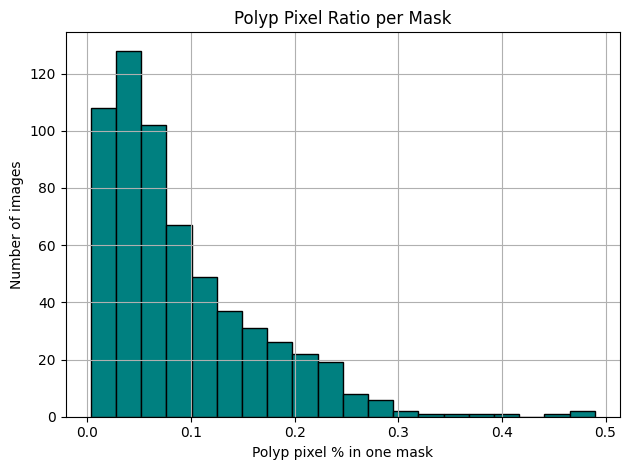

In [5]:
total_pixels = 0
polyp_pixels = 0
bg_pixels = 0
polyp_ratios = []

for path in tqdm(mask_paths):
    mask = np.array(Image.open(path).convert('L'))  # grayscale
    total = mask.size
    polyp = np.sum(mask == 255)
    bg = np.sum(mask == 0)

    total_pixels += total
    polyp_pixels += polyp
    bg_pixels += bg
    polyp_ratios.append(polyp / total)

polyp_percent = (polyp_pixels / total_pixels) * 100
bg_percent = (bg_pixels / total_pixels) * 100

print(f"# of Total Pixels: {total_pixels:,}")
print(f"# of Polyp Pixels: {polyp_pixels:,} ({polyp_percent:.2f}%)")
print(f"# of Background Pixels: {bg_pixels:,} ({bg_percent:.2f}%)")

plt.hist(polyp_ratios, bins=20, color='teal', edgecolor='black')
plt.title("Polyp Pixel Ratio per Mask")
plt.xlabel("Polyp pixel % in one mask")
plt.ylabel("Number of images")
plt.grid(True)
plt.tight_layout()
plt.savefig("polyp_pixel_ratio_hist.png")
plt.show()
